# Белов Дмитрий Алексеевич 
# 19-ИВТ-2
## Лабораторная работа №4
## Вариант 4

In [67]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Lasso

from scipy.stats import pearsonr, spearmanr

# Задание 1
### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

In [68]:
df = pd.read_csv('airfoil_self_noise.dat.txt', sep='\s+', names=["Frequency",
                                                        "Angle_of_attack",
                                                        "Chord_length",
                                                        "Free_stream_velocity",
                                                        "Suction_side_displacement_thickness",
                                                        "Scaled_sound_pressure_level",])
df

,Frequency,Angle_of_attack,Chord_length,Free_stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            1503 non-null   int64  
 1   Angle_of_attack                      1503 non-null   float64
 2   Chord_length                         1503 non-null   float64
 3   Free_stream_velocity                 1503 non-null   float64
 4   Suction_side_displacement_thickness  1503 non-null   float64
 5   Scaled_sound_pressure_level          1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [70]:
tabledata = [["Frequency ", "Частота", "дискретный"], #создание новой таблицы
             ["Angle of attack", "Угол атаки","вещественный"],
             ["Chord length", "Длина аккорда","вещественный"],
             ["Free-stream velocity", "Скорость свободного потока","вещественный"],
             ["Suction side displacement thickness", "Толщина смещения со стороны всасывания","вещественный"],
             ["Scaled sound pressure level", "Масштабированный уровень звукового давления","вещественный"],] 
tabledata
pd.DataFrame(tabledata, columns=[" Признак","Описание", "Тип"]) #название колонок

,Признак,Описание,Тип
0,Frequency,Частота,дискретный
1,Angle of attack,Угол атаки,вещественный
2,Chord length,Длина аккорда,вещественный
3,Free-stream velocity,Скорость свободного потока,вещественный
4,Suction side displacement thickness,Толщина смещения со стороны всасывания,вещественный
5,Scaled sound pressure level,Масштабированный уровень звукового давления,вещественный


# Задание 2
### Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.

In [71]:
df.shape #shape - размера, формы и размеров фреймов данных и серий.

(1503, 6)

In [72]:
df.drop_duplicates(inplace=True) #drop_duplicates - помогает удалить дубликаты из фрейма данных.inplace=True - удаляет строки с дубликатами, если True.
df.shape

(1503, 6)

# Задание 3
### Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

#### Разделим признаки на категориальные и количественные

In [73]:
df.nunique() #nunique() используется для подсчета уникальных значений.

Frequency                                21
Angle_of_attack                          27
Chord_length                              6
Free_stream_velocity                      4
Suction_side_displacement_thickness     105
Scaled_sound_pressure_level            1456
dtype: int64

#### Chord length  и  Free-stream velocity  - категориальные признаки

In [74]:
df.Chord_length = df.Chord_length.apply(lambda x: str(x)) #присваем сторокой тип столбцу Chord length
df.Free_stream_velocity = df.Free_stream_velocity.apply(lambda x: str(x)) #присваем сторокой тип столбцу Free-stream velocity

numerical_columns = df.columns[df.dtypes != 'object'] #разделяем на количественные признаки
categorical_columns = df.columns[df.dtypes == 'object'] #разделяем на категориальные признаки

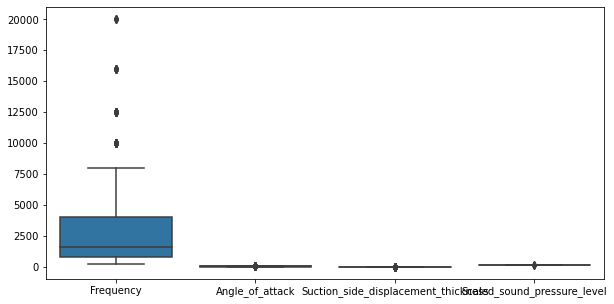

In [75]:
plt.figure(figsize=(10,5)) #создаем фигуру размером 10 на 5
sns.boxplot(data=df[numerical_columns]) #выбираем нужные колонки
plt.show() #вывод боксплота

In [76]:
scaler = MinMaxScaler() #Диапазон по умолчанию для функции, возвращаемой MinMaxScaler, составляет от 0 до 1.
df[numerical_columns] = scaler.fit_transform(df[numerical_columns]) #Применяем функцию к набору данных с помощью функции fit_transform().
df.head() #вывод таблицы

,Frequency,Angle_of_attack,Chord_length,Free_stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
0,0.030303,0.0,0.3048,71.3,0.039005,0.606829
1,0.040404,0.0,0.3048,71.3,0.039005,0.580238
2,0.053030,0.0,0.3048,71.3,0.039005,0.600181
3,0.070707,0.0,0.3048,71.3,0.039005,0.643790
4,0.090909,0.0,0.3048,71.3,0.039005,0.640333


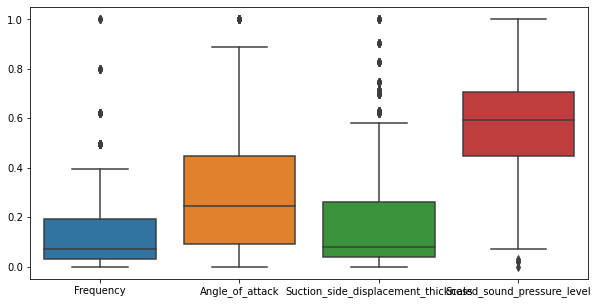

In [77]:
plt.figure(figsize=(10,5)) #вывод таблицы после маштабирования
sns.boxplot(data=df[numerical_columns])
plt.show() 

# Задание 4
###  Выполните замену категориальных признаков;выберите и обоснуйте способ замены;

In [78]:
print("Chord_length unique values - {}".format(df.Chord_length.unique())) #Выводим ункальные значения в столбце Chord_length
print("Free_stream_velocity unique values - {}".format(df.Free_stream_velocity.unique())) #Выводим ункальные значения в столбце Free_stream_velocity

Chord_length unique values - ['0.3048' '0.2286' '0.1524' '0.0508' '0.0254' '0.1016']
Free_stream_velocity unique values - ['71.3' '55.5' '39.6' '31.7']


#### Уникальных значений мало, поэтмому можно применить dummy-кодирование

In [79]:
onehot_encoder = OneHotEncoder(sparse=False)
for column in categorical_columns:
    headers = [float(item) for item in df[column].unique()]
    headers.sort()
    df_categorical = pd.DataFrame(onehot_encoder.fit_transform(df[column].values.reshape(-1,1)),
                                columns=["{}_{}".format(column,i) for i in headers])
    df.drop(column, axis=1, inplace=True)
    df = pd.concat([df_categorical, df] , axis=1)
df.head()
#get_dummies() используется для разделения каждой строки в ряду вызывающих в переданном разделителе.
# Если текстовое значение в исходном фрейме данных с тем же индексом содержит строку (имя столбца / разделенные значения), то значение в этой позиции равно 1, в противном случае — 0.

,Free_stream_velocity_31.7,Free_stream_velocity_39.6,Free_stream_velocity_55.5,Free_stream_velocity_71.3,Chord_length_0.0254,Chord_length_0.0508,Chord_length_0.1016,Chord_length_0.1524,Chord_length_0.2286,Chord_length_0.3048,Frequency,Angle_of_attack,Suction_side_displacement_thickness,Scaled_sound_pressure_level
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.030303,0.0,0.039005,0.606829
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.040404,0.0,0.039005,0.580238
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.053030,0.0,0.039005,0.600181
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.070707,0.0,0.039005,0.643790
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.090909,0.0,0.039005,0.640333


# Задание 5
### Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

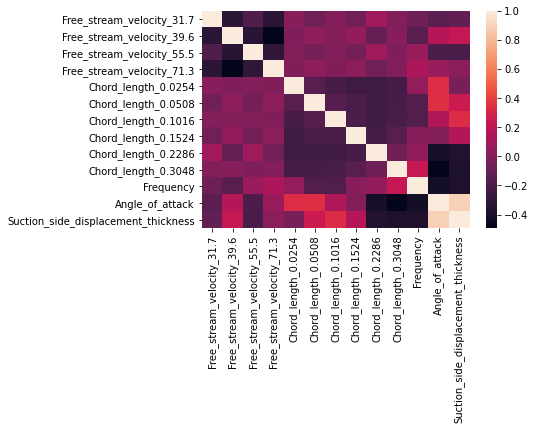

In [86]:
df_corr = df.drop('Scaled_sound_pressure_level', axis=1).corr()
sns.heatmap(df_corr) #создание тепловой карты
plt.show() #вывод карты

# Задание 6
### Заполните пропущенные значения в данных;

In [87]:
df.notnull().count() #вывод ненулевых значений и их подсчет

Free_stream_velocity_31.7              14
Free_stream_velocity_39.6              14
Free_stream_velocity_55.5              14
Free_stream_velocity_71.3              14
Chord_length_0.0254                    14
Chord_length_0.0508                    14
Chord_length_0.1016                    14
Chord_length_0.1524                    14
Chord_length_0.2286                    14
Chord_length_0.3048                    14
Frequency                              14
Angle_of_attack                        14
Suction_side_displacement_thickness    14
Scaled_sound_pressure_level            14
dtype: int64

# Задание 7
### Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйтеперекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказаннымс учётом p-value.

#### линейная регрессия, LASSO регуляризатор

In [109]:
from  sklearn import linear_model
#разделяем данных на “атрибуты” и “метки”. Атрибуты являются независимыми переменными, а метки-зависимыми переменными, значения которых должны быть предсказаны.
X, y = df.drop(['Scaled_sound_pressure_level'], axis=1), df['Scaled_sound_pressure_level']
#разделяем эти данные на обучающие и тестовые наборы. Мы сделаем это с помощью встроенного метода Scikit-Learn train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123) #разбивает 70% данных на обучающий набор, а 30% – на тестовый. Переменная test_size – это то место, где мы фактически указываем долю тестового набора.
#обучение алгоритма
reg = linear_model.Lasso (alpha = 0.1)
reg.fit (X_train, y_train)

Lasso(alpha=0.1)

In [110]:
#выводим реальные значения
xt = reg.predict(X_test)
print(xt[:10])

[0.04828068 0.04828068 0.04828068 0.04828068 0.04828068]


In [111]:
#выводим предсказанные значения
print(y_test[:10])

Chord_length_0.1524         -0.126936
Frequency                   -0.390711
Chord_length_0.0254          0.150810
Free_stream_velocity_31.7   -0.038819
Chord_length_0.0508          0.097720
Name: Scaled_sound_pressure_level, dtype: float64


In [112]:
#Вычислияем точность решения задачи, вычислив разницу между реальным значением и предсказанным.
print(xt[:10]-y_test[:10])

Chord_length_0.1524          0.175216
Frequency                    0.438992
Chord_length_0.0254         -0.102529
Free_stream_velocity_31.7    0.087100
Chord_length_0.0508         -0.049439
Name: Scaled_sound_pressure_level, dtype: float64


In [113]:
#выводим значение для перехвата,вычисленное алгоритмом линейной регрессии для нашего набора данных
reg.coef_

array([ 0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0., -0., -0.])

In [114]:
#выводи значения для наклона,вычисленное алгоритмом линейной регрессии для нашего набора данных
reg.intercept_

0.04828067799973887

#### линейная регрессия без использования регуляризаторов

In [101]:
#разделяем данных на “атрибуты” и “метки”. Атрибуты являются независимыми переменными, а метки-зависимыми переменными, значения которых должны быть предсказаны.
X, y = df.drop(['Scaled_sound_pressure_level'], axis=1), df['Scaled_sound_pressure_level']
#разделяем эти данные на обучающие и тестовые наборы. Мы сделаем это с помощью встроенного метода Scikit-Learn train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123) ##разбивает 70% данных на обучающий набор, а 30% – на тестовый. Переменная test_size – это то место, где мы фактически указываем долю тестового набора.
#обучение алгоритма
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [102]:
##выводим значение для перехвата,вычисленное алгоритмом линейной регрессии для нашего набора данны
reg.coef_

array([ 0.29649969, -0.21020456, -0.12715933,  0.06859581,  0.16496397,
        0.46314186, -0.01643679,  0.24305685, -0.41640852, -0.4870218 ,
       -1.12397916, -0.63832232, -0.47211619])

In [103]:
#выводи значения для наклона,вычисленное алгоритмом линейной регрессии для нашего набора данных
reg.intercept_

0.16337547500389804

In [107]:
corr['pearson'], pvalue_pearson = pearsonr(reg_pred, y_test) #коэффициент корреляции Пирсона между реальным значением и предсказанным значением
corr['spearman'], pvalue_spearman = spearmanr(reg_pred, y_test) #коэффициент корреляции Спирмена между реальным значением и предсказанным значением
print('Pearson’s correlation coefficient: ', corr['pearson'], '\np-value: ', pvalue_pearson) #коэффициент корреляции Пирсона между реальным значением и предсказанным значением c учетом p-value
print('Spearman’s correlation coefficient: ', corr['spearman'], '\np-value: ', pvalue_spearman) #коэффициент корреляции Спирмена между реальным значением и предсказанным значением c учетом p-value

Pearson’s correlation coefficient:  0.6873671039470632 
p-value:  0.19970560621955213
Spearman’s correlation coefficient:  0.3 
p-value:  0.6238376647810728
